In [ ]:
import gym 
import pandaRL
import os
import numpy as np
import time
import glob
import config
#env = env = gym.make('pandaPlayJoints1Obj-v0')
# env.render(mode='human')
# o = env.reset()
import matplotlib.pyplot as plt


In [ ]:
import config
PYBULLET_DATA_DIR = config.ONEOBJ_PLAY # config.SCRIPTED_PLAY #config.RPL_PATH

In [ ]:

def load_data(path, keys):
    dataset = {k:[] for k in keys+['sequence_index','sequence_id']}
    obs_act_path = os.path.join(path, 'obs_act_etc/')

    for demo in os.listdir(obs_act_path):
        traj = np.load(obs_act_path+demo+'/data.npz')
        for k in keys:
            dataset[k].append(traj[k].astype(np.float32))
        timesteps = len(traj['obs'])
        dataset['sequence_index'].append(np.arange(timesteps, dtype=np.int32).reshape(-1, 1))
        dataset['sequence_id'].append(np.full(timesteps, fill_value=int(demo), dtype=np.int32).reshape(-1, 1))

    # convert to numpy
    for k in keys+['sequence_index','sequence_id']:
        dataset[k] = np.vstack(dataset[k])
    return dataset

keys = ['obs', 'acts', 'achieved_goals', 'joint_poses', 'target_poses', 'acts_rpy', 'acts_rpy_rel',  'velocities', 'rpy_obs']
dataset = load_data(PYBULLET_DATA_DIR, keys)

In [ ]:
env = gym.make('pandaPlay1Obj-v0')
env.render(mode='human')
o = env.reset()

In [ ]:
f= 33
#base_path = 'data_collection/collected_data/play_demos/'
base_path = config.ONEOBJ_PLAY
data = np.load(base_path+'obs_act_etc/'+str(f)+'/data.npz')
potential_start_points = glob.glob(base_path+'/states_and_ims/'+str(f)+'/env_states/*.bullet')
actions = data['acts']
observations = data['obs']

def get_random_start_point(potential_start_points):
    idx = np.random.choice(len(potential_start_points))
    path = potential_start_points[idx]
    if config.OS == 'windows':
        tstep = int(path.split('\\')[-1].replace('.bullet',''))
    else:
        tstep = int(path.split("/")[-1].replace('.bullet',''))
    return path, tstep
    


In [ ]:
path, start = get_random_start_point(potential_start_points)

env.p.restoreState(fileName=path)

In [ ]:

print(path)
os = []
for i in range(start, start+200):
    a = actions[i,:]
    #a = np.concatenate([a[0:3], env.p.getEulerFromQuaternion(a[3:7]), np.expand_dims(a[-1],0)])
    
    a = a# + a*(np.random.rand(8)-0.5)*0.02
    o, r, _, d = env.step(a )
    os.append(o['observation'])

In [ ]:
import time

In [ ]:
print(path)
os = []
for i in range(start, start+400):
    #a = np.concatenate([a[0:3], env.p.getEulerFromQuaternion(a[3:7]), np.expand_dims(a[-1],0)])
    env.visualise_sub_goal(sub_goals[i,:])
    time.sleep(0.02)


In [ ]:
env.panda.delete_sub_goal()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(np.linalg.norm(actions[start:start+200,3:7],axis = -1))

In [ ]:
np.linalg.norm(actions[start:start+200,3:7], axis = -1)

In [ ]:
# import pybullet as p
# keys = ['obs', 'acts', 'achieved_goals', 'joint_poses', 'target_poses', 'acts_rpy', 'acts_rpy_rel',  'velocities']

# def load_data(path, keys):
#     dataset = {k:[] for k in keys+['sequence_index','sequence_id']}
#     obs_act_path = os.path.join(path, 'obs_act_etc/')

#     for demo in os.listdir(obs_act_path):
#         data_dict = {}
        
        
#         traj = np.load(obs_act_path+demo+'/data.npz')
        
#         rpy_acts = []
#         rpy_obs = []
#         for k in traj.keys():
#             print(k)

            
#         for o in list(traj['obs']):
#             rpy_obs.append(np.concatenate([o[0:3], p.getEulerFromQuaternion(o[3:7]), o[7:]]))
        
#         path = obs_act_path+demo+'/data.npz'
#         print(path.replace(".npz", ""))
#         np.savez(path.replace(".npz", ""), acts=traj['acts'], obs=traj['obs'],
#                      achieved_goals =traj['achieved_goals'], controllable_achieved_goals =traj['controllable_achieved_goals'], joint_poses=traj['joint_poses'],
#                      target_poses=traj['target_poses'],acts_rpy = traj['acts_rpy'],
#                      acts_rpy_rel = traj['acts_rpy_rel'],  velocities =traj['velocities'], rpy_obs=np.array(rpy_obs))
#     return dataset

# dataset = load_data(PYBULLET_DATA_DIR, keys)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(dataset['rpy_obs'][100000:, 3:6])

In [ ]:
plt.plot(dataset['acts_rpy'][56000:57000, 3:6])

In [ ]:
env = env = gym.make('pandaPlay1Obj-v0')
env.render(mode='human')
o = env.reset()

In [ ]:
door_positions = {'left': -0.15, 'middle': 0.0, 'right': 0.15}
drawer_positions = {'closed': -0.1, 'middle': 0.0, 'open': 0.1}
button_positions = {'open': 0.029, 'closed': 0.0}
dial_positions = {'default':0}
obj_poses = {'default': [0,0.2,0.0], 'shelf':[0,0.43, 0.27], 'left':[-0.2, 0.2,0.0], 'right':[0.2,0.2,0.0],'closed_drawer': [-0.15, 0.1, -0.09], 'open_drawer':[-0.15, -0.15, -0.09], 'cupboard_left': [-0.2, 0.45, 0.0], 'cupboard_right':[0.2, 0.45, 0.0]}
obj_oris = {'upright': [0,0.7,0,0.7], 'default':[0,0,0,1], 'lengthways':[0.0, 0.0, 0.7071, 0.7071]}

In [ ]:
def test_suite_reset(env, obj_ori = 'default', obj_pos = 'default', door = 'middle', drawer = 'middle', button = 'open', dial = 'default'):
    obj_offset = np.array([0.,0.,0.])
    if  obj_ori == 'upright':
        obj_offset += np.array([0,0.,0.025])
        
    positions = [door_positions[door], drawer_positions[drawer], button_positions[button], dial_positions[dial]]
             
    for idx, j in enumerate(env.panda.joints):
        env.panda.bullet_client.resetJointState(j, 0, positions[idx]) # reset drawer, button etc
        
    env.panda.bullet_client.resetBasePositionAndOrientation(env.panda.objects[0],
                                                            np.array(obj_poses[obj_pos])+obj_offset, obj_oris[obj_ori])
    
    
    
def define_goal(env,obj_ori = 'default', obj_pos = 'default', door = 'middle', drawer = 'middle', button = 'open', dial = 'default'):
    # We know the goal is 
    # objpos (3), obj_ori(4), door, drawer, button, dial
    obj_offset = np.array([0.,0.,0.])
    if  obj_ori == 'upright':
        obj_offset += np.array([0,0.,0.025])
    
    goal = list(np.array(obj_poses[obj_pos])+obj_offset)+list(obj_oris[obj_ori])+[door_positions[door],drawer_positions[drawer], button_positions[button],dial_positions[dial]]
    return np.array(goal)


In [ ]:
#now, how to measure success?

def door_left(env):
    test_suite_reset(env, door = 'right')
    return define_goal(env, door = 'left')

def door_right(env):
    test_suite_reset(env, door = 'left')
    return define_goal(env, door = 'right')

def open_drawer(env):
    test_suite_reset(env, drawer='closed')
    return define_goal(env, drawer = 'open')

def close_drawer(env):
    test_suite_reset(env, drawer='open')
    return define_goal(env, drawer = 'closed')

def push_left(env):
    test_suite_reset(env, obj_ori='lengthways')
    return define_goal(env, obj_ori='lengthways', obj_pos='left')

def push_right(env):
    test_suite_reset(env, obj_ori='lengthways')
    return define_goal(env, obj_ori='lengthways', obj_pos='right')

def block_in_cupboard_right(env):
    test_suite_reset(env, door='left')
    return define_goal(env, door = 'left', obj_pos='cupboard_right')

def block_in_cupboard_left(env):
    test_suite_reset(env, door='right')
    return define_goal(env, door = 'right', obj_pos='cupboard_left')

def block_in_cupboard_right_upright(env):
    test_suite_reset(env, door='left', obj_ori='upright')
    return define_goal(env, door = 'left', obj_pos='cupboard_right', obj_ori='upright')

def block_in_cupboard_left_upright(env):
    test_suite_reset(env, door='right', obj_ori='upright')
    return define_goal(env, door = 'right', obj_pos='cupboard_left', obj_ori='upright')

def block_default_to_upright(env):
    test_suite_reset(env, obj_ori='default')
    return define_goal(env, obj_ori='upright')

def block_lengthways_to_upright(env):
    test_suite_reset(env, obj_ori='lengthways')
    return define_goal(env, obj_ori='upright')

def block_default_to_lengthways(env):
    test_suite_reset(env, obj_ori='default')
    return define_goal(env, obj_ori='lengthways')

def block_lengthways_to_default(env):
    test_suite_reset(env, obj_ori='lengthways')
    return define_goal(env, obj_ori='default')

def press_button(env):
    test_suite_reset(env, door='right')
    return define_goal(env, door='right', button='closed')

def block_on_shelf(env):
    test_suite_reset(env, obj_ori='upright')
    return define_goal(env, obj_pos='shelf',obj_ori='upright')

def block_in_open_drawer(env):
    test_suite_reset(env, drawer='open')
    return define_goal(env, drawer='open', obj_pos='open_drawer')

def block_in_open_drawer_lengthways(env):
    test_suite_reset(env, drawer='open', obj_ori='lengthways')
    return define_goal(env, drawer='open', obj_ori='lengthways', obj_pos='open_drawer')

# Multi part objectives
def press_button_with_door_obstacle(env):
    test_suite_reset(env, door='left')
    return define_goal(env, door='right', button='closed')

def block_in_drawer_and_close(env):
    test_suite_reset(env, drawer='open', obj_ori='lengthways')
    return define_goal(env, drawer='closed', obj_ori='lengthways', obj_pos='closed_drawer')



In [ ]:
#now, how to measure success?

tests = [door_left,door_right,open_drawer,close_drawer,push_left,push_right,block_in_cupboard_right,
         block_in_cupboard_left,block_in_cupboard_right_upright, block_in_cupboard_left_upright, block_default_to_upright,
         block_lengthways_to_upright, block_default_to_lengthways, block_lengthways_to_default, press_button,block_on_shelf,
         block_in_open_drawer,block_in_open_drawer_lengthways,
         press_button_with_door_obstacle,block_in_drawer_and_close]



In [ ]:
import time

In [ ]:
for f in tests:
    print(f.__name__)
    f(env)
    time.sleep(0.5)

In [ ]:
test_suite_reset(env, obj_ori = 'lengthways', obj_pos = 'closed_drawer', door = 'middle', drawer = 'closed')

In [ ]:
define_goal(env)

In [ ]:
o = env.reset()


In [ ]:
for i in range(0,1000):
    env.p.stepSimulation()

In [ ]:
env.panda.bullet_client.getJointState(env.panda.joints[2], 0)[0]

In [ ]:
env.panda.bullet_client.resetJointState(env.panda.joints[0], 0, -3)

In [1]:
import gym 
import pandaRL
import os
import numpy as np
import time
import glob
import matplotlib.pyplot as plt
import config
env = gym.make('pandaPlayAbsRPY1Obj-v0')
env.render(mode='human')
o = env.reset()

C:\Users\sholt\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


c:\users\sholt\desktop\pandarl\pandaRL\envs


In [2]:

for f in range(0,18):
    #base_path = 'data_collection/collected_data/play_demos/'
    base_path = config.ONEOBJ_PLAY
    data = np.load(base_path+'obs_act_etc/'+str(f)+'/data.npz')
    potential_start_points = glob.glob(base_path+'/states_and_ims/'+str(f)+'/env_states/*.bullet')
    actions = data['acts_rpy']
    observations = data['obs']
    #joint_targets = data['target_poses']
    plt.plot(data['acts_rpy_rel'][:,3:6])
    plt.show()

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

<Figure size 432x288 with 1 Axes>

In [3]:
# Play some representative sample data



f= 12
#base_path = 'data_collection/collected_data/play_demos/'
base_path = config.Hz30
data = np.load(base_path+'obs_act_etc/'+str(f)+'/data.npz')
potential_start_points = glob.glob(base_path+'/states_and_ims/'+str(f)+'/env_states/*.bullet')
actions = data['acts_rpy']
observations = data['obs']
joint_targets = data['target_poses']
plt.plot(data['acts_rpy_rel'][3471:3550,:])

<Figure size 432x288 with 1 Axes>

In [4]:
dataset_len = len(actions)
print(dataset_len)

4837


In [5]:
def get_random_start_point(potential_start_points):
    idx = np.random.choice(len(potential_start_points))
    path = potential_start_points[idx]
    if config.OS == 'windows':
        tstep = int(path.split('\\')[-1].replace('.bullet',''))
    else:
        tstep = int(path.split("/")[-1].replace('.bullet',''))
    return path, tstep
    



In [ ]:


start = 3471
path = base_path+ f'states_and_ims/{f}/env_states/{start}.bullet'
print(path)

In [6]:
path, start = get_random_start_point(potential_start_points)


In [7]:
env.p.restoreState(fileName=path)

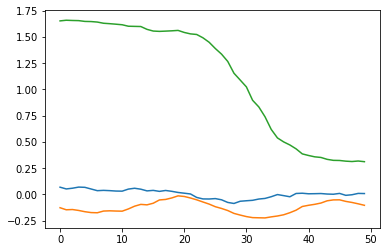

In [8]:
plt.plot(actions[:,3:6][start:start+50])

In [9]:


env.p.restoreState(fileName=path)
print(path)
os = []
for i in range(start, start+400):
    a = actions[i,:]
    #a = np.concatenate([a[0:3], env.p.getEulerFromQuaternion(a[3:7]), np.expand_dims(a[-1],0)])
    
    o, r, _, d = env.step(a )
    os.append(o['observation'])

data_collection/collected_data/30Hz_one_obj//states_and_ims/12/env_states/480.bullet


In [ ]:
a

In [ ]:
(np.random.rand(7)-0.5)*0.02

In [ ]:
import matplotlib.pyplot as plt
t = np.array(os)
actions_space = t.shape[-1]
length = len(t)
x = np.linspace(0, length, num=length)
for i in range(0,actions_space):
    fig, axes = plt.subplots(1, 1, figsize=(6,1.0), squeeze=False)
    axes[0,0].plot(x,t[:,i],'green')
    plt.show()

# Run with motor actions

In [ ]:
path, start = get_random_start_point(potential_start_points)
env.p.restoreState(fileName=path)

for i in range(start, start+400):
    targetPoses = joint_targets[i,:]
    indexes =  [i for i in range(7)]
    env.p.setJointMotorControlArray(env.panda.panda,indexes, env.p.POSITION_CONTROL,
                                                         targetPositions=targetPoses ,
                                                         forces=[5 * 240.]*len(indexes))
    gripper = actions[i,-1]
    for i in [9, 10]:
        env.p.setJointMotorControl2(env.panda.panda, i, env.p.POSITION_CONTROL, gripper,
                                             force=100)

    env.panda.runSimulation()
    time.sleep(0.005)

# Everything below here is just rough working

In [ ]:
import matplotlib.pyplot as plt
o, r ,_,_ = env.step(env.action_space.sample())
plt.imshow(o['img'])
plt.show()

In [ ]:
path = 'data_collection/collected_data/play_demos/'
obs_act_path = path+'obs_act_etc/'

for demo in os.listdir(obs_act_path):

    traj = np.load(obs_act_path+demo+'/data.npz')
    traj = {key:traj[key] for key in keys}
    reset_states = []
    for i in range(0, len(traj[keys[0]])):
        # these are needed for deterministic resetting
        reset_states.append(path+'/states_and_ims/'+demo+'/env_states/'+str(i)+'.bullet')
    traj['reset_states'] = reset_states
    traj['reset_idx'] = int(demo)
    dataset.append(traj)

    cnt[len(traj[keys[0]])]+=1

In [ ]:
import os
import numpy as np
path = 'data_collection/collected_data/play_demos/'
obs_act_path = path+'obs_act_etc/'
l = os.listdir(obs_act_path)
l.sort(key=float)


In [ ]:
for i in l:
    npz_length = np.load(obs_act_path + i +'/data.npz')['obs'].shape[0]
    states_len = len(os.listdir(path + 'states_and_ims/'+i+'/env_states/'))
    print(i, npz_length, states_len)
    

In [ ]:
import glob
import pickle
import random
from collections import Counter
import subprocess
import shlex
from multiprocessing.pool import ThreadPool
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import os
import numpy as np

############## Everything from here for pybullet style #################################
def load_data(path, keys):
    cnt = Counter()
    dataset = []
    obs_act_path = os.path.join(path, 'obs_act_etc/')

    for demo in os.listdir(obs_act_path):
        
        traj = np.load(obs_act_path+demo+'/data.npz')
        traj = {key:traj[key] for key in keys}
        reset_states = []
        for i in range(0, len(traj[keys[0]])):
            # these are needed for deterministic resetting
            reset_states.append(path+'/states_and_ims/'+demo+'/env_states/'+str(i)+'.bullet')
        traj['reset_states'] = reset_states
        traj['reset_idx'] = int(demo)
        dataset.append(traj)
        
        cnt[len(traj[keys[0]])]+=1
        
    return dataset,cnt

In [ ]:
path  = config.ONEOBJ_PLAY # config.SCRIPTED_PLAY #config.RPL_PATH
keys = ['obs', 'acts', 'achieved_goals', 'joint_poses', 'target_poses', 'controllable_achieved_goals']

In [ ]:
obs_act_path = os.path.join(path, 'obs_act_etc/')
for demo in os.listdir(obs_act_path):
        
        traj = np.load(obs_act_path+demo+'/data.npz')
        traj = {key:traj[key] for key in keys}
        #Fix the acts and the obs
        quat_sign_flip(traj['acts'], [(3,7)])
        quat_sign_flip(traj['obs'], [(3,7), (10,14)])
        quat_sign_flip(traj['achieved_goals'], [(3,7)])
        np.savez(obs_act_path+demo+'/data.npz', acts=traj['acts'], obs=traj['obs'], achieved_goals=traj['achieved_goals'],controllable_achieved_goals=traj['controllable_achieved_goals'], joint_poses=traj['joint_poses'],  target_poses=traj['target_poses'])
        

In [ ]:
np.savez('test', acts=traj['acts'], obs=traj['obs'], achieved_goals=traj['achieved_goals'],controllable_achieved_goals=traj['controllable_achieved_goals'], joint_poses=traj['joint_poses'],  target_poses=traj['target_poses'])

In [ ]:
traj = np.load('test.npz')

In [ ]:
traj['achieved_goals'].shape

In [ ]:

def quat_sign_flip(a, idxs):
    for pair in idxs:
        for i in range(1,len(a)):
            
            quat = a[i,pair[0]:pair[1]]
            last_quat = a[i-1,pair[0]:pair[1]]
            if (np.sign(quat)== -np.sign(last_quat)).all(): # i.e, it is an equivalent quaternion
                a[i,pair[0]:pair[1]] = - a[i,pair[0]:pair[1]]
    return a 


In [ ]:
import matplotlib.pyplot as plt
t =  traj['acts']
actions_space = t.shape[-1]
length = len(traj['acts'])
x = np.linspace(0, length, num=length)
for i in range(0,actions_space):
    fig, axes = plt.subplots(1, 1, figsize=(6,1.0), squeeze=False)
    axes[0,0].plot(x,t[:,i],'green')
    plt.show()

In [ ]:
t = traj['obs']
actions_space = t.shape[-1]
length = len(traj['acts'])
x = np.linspace(0, length, num=length)
for i in range(0,actions_space):
    fig, axes = plt.subplots(1, 1, figsize=(6,1.0), squeeze=False)
    axes[0,0].plot(x,t[:,i],'green')
    plt.show()

In [ ]:
t = quat_sign_flip(traj['obs'], [(3,7), (11,14)])
actions_space = t.shape[-1]
length = len(traj['acts'])
x = np.linspace(0, length, num=length)
for i in range(0,actions_space):
    fig, axes = plt.subplots(1, 1, figsize=(6,1.0), squeeze=False)
    axes[0,0].plot(x,t[:,i],'green')
    plt.show()

In [ ]:
timestep = 1/240.
control_Hz = 20
n_steps = 1/control_Hz/timestep

In [ ]:

                       
start = 0
for i in range(start, dataset_len ):
    env.p.restoreState(fileName='data_collection/collected_data/play_demos/'+str(f)+'/env_states/'+str(i)+'.bullet')
    time.sleep(0.005)
    
#env.p.restoreState(fileName='data_collection/collected_data/play_demos/'+str(f)+'/env_states/'+str(start)+'.bullet')

In [ ]:
f = 0
data = np.load('data_collection/collected_data/play_demos/'+str(f)+'/data.npz')

In [ ]:
start = 200
env.p.restoreState(fileName='data_collection/collected_data/play_demos/'+str(f)+'/env_states/'+str(start)+'.bullet')
for i in range(start, start+400):
    act = actions[i,:]
    act[0:3] = act[0:3] + observations[i,0:3]
    POS, ORI, GRIPPER = act[0:3], act[3:7], act[7]
    env.panda.goto(POS, ORI, GRIPPER)
    env.panda.runSimulation()
    time.sleep(0.02)

In [ ]:
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

In [ ]:
dist = tfd.Logistic(loc=[0], scale=[-0.001])

In [ ]:
-dist.log_prob(0)

In [ ]:
f = 8
start = 200
env.p.restoreState(fileName='data_collection/collected_data/play_demos/'+str(f)+'/env_states/'+str(start)+'.bullet')

In [ ]:
np.amax(data['joint_poses'], 0)

In [ ]:

np.amin(data['joint_poses'], 0)

In [ ]:

data['joints']

In [ ]:

env.p.setVRCameraState([0.0, -0.3, -1.5], env.p.getQuaternionFromEuler([0, 0, 0]))


In [ ]:
o['observation'].shape

In [ ]:
start = 1400
actions = data['acts']
env.p.restoreState(fileName='data_collection/collected_data/play_demos/'+str(f)+'/env_states/'+str(start)+'.bullet')
for i in range(start, start+400):
    env.step(actions[i,:])
    time.sleep(0.005)
    


In [ ]:
start = 1400
for i in range(start, start+400):
    env.p.restoreState(fileName='data_collection/collected_data/play_demos/'+str(f)+'/env_states/'+str(i)+'.bullet')
    time.sleep(0.02)

In [ ]:
def add_button(bullet_client, offset = np.array([0,0,0])):
    sphereRadius = 0.02
    colBoxId = bullet_client.createCollisionShape(bullet_client.GEOM_BOX,
                                      halfExtents=[sphereRadius, sphereRadius, sphereRadius/4])

    mass = 0
    visualShapeId = bullet_client.createVisualShape(bullet_client.GEOM_BOX, halfExtents=[sphereRadius, sphereRadius, sphereRadius/4],
                                                 rgbaColor=[1, 0, 0, 1])

    link_Masses = [0.1]
    linkCollisionShapeIndices = [colBoxId]
    linkVisualShapeIndices = [visualShapeId]
    linkPositions = [[-0.25,0.45, 0.70]]
    linkOrientations = [bullet_client.getQuaternionFromEuler([0,0,0])]
    linkInertialFramePositions = [[0, 0, 0]]
    linkInertialFrameOrientations = [[0, 0, 0, 1]]
    indices = [0]
    # jointTypes = [bullet_client.JOINT_REVOLUTE]
    jointTypes = [bullet_client.JOINT_PRISMATIC]
    axis = [[0, 0, 1]]

    basePosition = np.array([0, 0, -0.7])+offset
    baseOrientation = [0, 0, 0, 1]

    sphereUid = bullet_client.createMultiBody(mass,
                                  colBoxId,
                                  visualShapeId,
                                  basePosition,
                                  baseOrientation,
                                  linkMasses=link_Masses,
                                  linkCollisionShapeIndices=linkCollisionShapeIndices,
                                  linkVisualShapeIndices=linkVisualShapeIndices,
                                  linkPositions=linkPositions,
                                  linkOrientations=linkOrientations,
                                  linkInertialFramePositions=linkInertialFramePositions,
                                  linkInertialFrameOrientations=linkInertialFrameOrientations,
                                  linkParentIndices=indices,
                                  linkJointTypes=jointTypes,
                                  linkJointAxis=axis)

    bullet_client.changeDynamics(sphereUid,
                     -1,
                     spinningFriction=0.001,
                     rollingFriction=0.001,
                     linearDamping=0.0)
    bullet_client.setJointMotorControl2(sphereUid, 0, bullet_client.POSITION_CONTROL, targetPosition=0.03, force=1)
    return sphereUid


In [ ]:
bullet_client = env.p
button = add_button(env.p)

In [ ]:
def get_joint_obs(bullet_client, item):
    return bullet_client.getJointState(item, 0)[0]

In [ ]:
import time
while(1):
    o,r,d,_ = env.step(env.action_space.sample())
    #print(get_joint_obs(bullet_client, button))
    print(o[:-4])
    time.sleep(0.05)

In [ ]:

side = 0.2



# Cabinet sides
colcubeId = bullet_client.createCollisionShape(bullet_client.GEOM_BOX, halfExtents=[0.01, 0.065, 0.235])
visplaneId = bullet_client.createVisualShape(bullet_client.GEOM_BOX, halfExtents=[0.01, 0.065, 0.235],
                                             rgbaColor=[0.75, 0.4 ,0.2,1])
block = bullet_client.createMultiBody(0.0, colcubeId, visplaneId, [-0.34, 0.45, -0.00])

colcubeId = bullet_client.createCollisionShape(bullet_client.GEOM_BOX, halfExtents=[0.01, 0.065, 0.235])
visplaneId = bullet_client.createVisualShape(bullet_client.GEOM_BOX, halfExtents=[0.01, 0.065, 0.235],
                                             rgbaColor=[0.75, 0.4 ,0.2,1])
block = bullet_client.createMultiBody(0.0, colcubeId, visplaneId, [0.34, 0.45, -0.00])

# Cabinet back

In [ ]:
USE_VR = None  
import socket
import pybullet as p
import time
import pybullet_data
import numpy as np
from pickle import dumps
import math 
#p.connect(p.UDP,"192.168.86.100")
cid = p.connect(p.SHARED_MEMORY)

if (cid<0):
    p.connect(p.GUI)
    USE_VR = False
else:
    print("Connected to shared memory")
    USE_VR = True # Use either GUI or VR to set commands. 

p.setAdditionalSearchPath(pybullet_data.getDataPath())
print(pybullet_data.getDataPath())
p.resetSimulation()

In [ ]:
bullet_client = env.p
side = 0.2

# TableTop
colcubeId = bullet_client.createCollisionShape(bullet_client.GEOM_BOX, halfExtents=[0.4, 0.28, 0.005])
visplaneId = bullet_client.createVisualShape(bullet_client.GEOM_BOX, halfExtents=[0.4, 0.28, 0.005],
                                             rgbaColor=[0.75, 0.4 ,0.2,1])
block = bullet_client.createMultiBody(0.0, colcubeId, visplaneId, [0, 0.25, -0.03])

# Cabinet back
colcubeId = bullet_client.createCollisionShape(bullet_client.GEOM_BOX, halfExtents=[0.4, 0.01, 0.22])
visplaneId = bullet_client.createVisualShape(bullet_client.GEOM_BOX, halfExtents=[0.4, 0.01, 0.22],
                                             rgbaColor=[0.75, 0.4 ,0.2,1])
block = bullet_client.createMultiBody(0.0, colcubeId, visplaneId, [0., 0.52, -0.00])

# Cabinet back
colcubeId = bullet_client.createCollisionShape(bullet_client.GEOM_BOX, halfExtents=[0.4, 0.065, 0.005])
visplaneId = bullet_client.createVisualShape(bullet_client.GEOM_BOX, halfExtents=[0.4, 0.065, 0.005],
                                             rgbaColor=[0.75, 0.4 ,0.2,1])
block = bullet_client.createMultiBody(0.0, colcubeId, visplaneId, [0., 0.47, 0.22])

In [ ]:
env.reset()

In [ ]:
actions = data['acts']
actions.shape
np.mean(data['times'][1:] - data['times'][:-1])

In [ ]:

import socket
import pickle
HOST = '127.0.0.1'  # The server's hostname or IP address
PORT = 65432        # The port used by the server

s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect((HOST, PORT))

In [ ]:
%%time

s.sendall(b'Hello, world')
data = s.recv(1024)
print('Received', pickle.loads(data)) #repr(data)

In [ ]:
s.close()

In [ ]:
import time

In [ ]:
import adept_envs
import gym
import glob
import os
#from parse_mjl import parse_mjl_logs
from tqdm import tqdm
import numpy as np

In [ ]:
env = gym.make("kitchen_relax-v1")

In [ ]:
obs = env.reset()


In [ ]:
env.render()


In [ ]:
t0 = time.time()
while(1):
    joint_vels = np.zeros(9)
    env.step(np.array(joint_vels))
    t1 = time.time()
    print(t1-t0)
    t0=t1
    env.render()

In [ ]:
env.env.sim.model.key_qpos

In [ ]:
demo_dir = os.getcwd() + '/' + "kitchen_demos_multitask/"

demos = glob.glob(demo_dir + "/**/*.mjl", recursive=True)
print([d.strip(demo_dir) for d in demos])

In [ ]:
file = demos[1]
skip = 20
data = parse_mjl_logs(file, skip)
data

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
def histo(x):
    hist, bins = np.histogram(x, bins=50)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.title("Trajectory Lengths")
    plt.show()

In [ ]:
times = []
frames = []
timestep = []

for file in tqdm(demos):
    try:
        skip = 1
        data = parse_mjl_logs(file, skip)
        times.append(data['time'][-1] - data['time'][0])
        frames.append(len(data['ctrl']))
    except:
        pass

histo(times)
histo(frames)

In [ ]:
print(data['ctrl'].shape, data['qpos'].shape, data['qvel'].shape)

In [ ]:
file = demos[np.random.choice(len(demos))]
skip = 40 # this is frame skip
data = parse_mjl_logs(file, skip)
env.reset()
for i in range(0,len(data['qpos'])):
    env.robot.reset(env, data['qpos'][i], data['qvel'][i])
    env.render()

# The issue!
Now, the problem is that cntrl is at the full time frequency of the env - which is really fine. That means if frame skip is anything but 1 then the ctrl labels are wrong. Ideally we want a more reasonable time freq, which means we need to take the difference between the first 9 elements of q_pos, divide it by the time between and then that gives us our desired vel controls. Even better, tonight I'll modify the env for position control. 

See, the below fails - 

In [ ]:
env.reset()

In [ ]:
# playback demos and get data(physics respected)
def gather_training_data(env, data, filename='demo_playback.mp4', render=None):
    env = env.env
    FPS = 30
    render_skip = max(1, round(1. / \
        (FPS * env.sim.model.opt.timestep * env.frame_skip)))
    t0 = timer.time()

    # initialize
    env.reset()
    init_qpos = data['qpos'][0].copy()
    init_qvel = data['qvel'][0].copy()
    act_mid = env.act_mid
    act_rng = env.act_amp

    # prepare env
    env.sim.data.qpos[:] = init_qpos
    env.sim.data.qvel[:] = init_qvel
    env.sim.forward()
    #viewer(env, mode='initialize', render=render)

    # step the env and gather data
    path_obs = None
    for i_frame in range(data['ctrl'].shape[0] - 1):
        # Reset every time step
        # if i_frame % 1 == 0:
        #     qp = data['qpos'][i_frame].copy()
        #     qv = data['qvel'][i_frame].copy()
        #     env.sim.data.qpos[:] = qp
        #     env.sim.data.qvel[:] = qv
        #     env.sim.forward()

        obs = env._get_obs()

        # Construct the action
        # ctrl = (data['qpos'][i_frame + 1][:9] - obs[:9]) / (env.skip * env.model.opt.timestep)
        ctrl = (data['ctrl'][i_frame] - obs[:9])/(env.skip*env.model.opt.timestep)
        act = (ctrl - act_mid) / act_rng
        act = np.clip(act, -0.999, 0.999)
        next_obs, reward, done, env_info = env.step(act)
        if path_obs is None:
            path_obs = obs
            path_act = act
        else:
            path_obs = np.vstack((path_obs, obs))
            path_act = np.vstack((path_act, act))

        # render when needed to maintain FPS
        if i_frame % render_skip == 0:
            #viewer(env, mode='render', render=render)
            print(i_frame, end=', ', flush=True)
            env.render()
#     # finalize
#     if render:
#         viewer(env, mode='save', filename=filename, render=render)

    t1 = timer.time()
    print("time taken = %f" % (t1 - t0))

    # note that <init_qpos, init_qvel> are one step away from <path_obs[0], path_act[0]>
    return path_obs, path_act, init_qpos, init_qvel

In [ ]:


import time as timer
file = demos[np.random.choice(len(demos))]
skip = 40 # this is frame skip
data = parse_mjl_logs(file, skip)
render = True
obs, act,init_qpos, init_qvel = gather_training_data(env, data,\
                filename=data['logName'][:-4]+'_playback.mp4', render=render)

In [ ]:
print(len(obs))
env.robot.reset(env, init_qpos, init_qvel)
for i in range(0,len(act)):
    #rel_vector = data['qpos'][i+1][:9]-data['qpos'][i][:9]
    #vel = rel_vector / 0.08
    
    #env.robot.reset(env, data['qpos'][i], data['qvel'][i])
    env.step(act[i]) # the key change
    env.render()

In [ ]:
glob.glob('./kitchen_demos_multitask/*')

In [ ]:
import multiprocessing
import subprocess
import shlex
from multiprocessing.pool import ThreadPool
import glob
def call_proc(cmd):
    """ This runs in a separate thread. """
    p = subprocess.Popen(shlex.split(cmd), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    out, err = p.communicate()
    return (out, err)

pool = ThreadPool(multiprocessing.cpu_count()//2)
results = []
for path in glob.glob('./kitchen_demos_multitask/*'):
    cmd = f'python3 relay-policy-learning/adept_envs/adept_envs/utils/parse_demos.py --env "kitchen_relax-v1" -d "{path}/" -s "40" -v "playback" -r "offscreen"'
    results.append(pool.apply_async(call_proc, (cmd,)))
# Close the pool and wait for each running task to complete
pool.close()
pool.join()
for result in results:
    out, err = result.get()
    print(f"out: {out.decode()}")
    print(f"err: {err.decode()}")

# Env Info 

## Action Space

Action space is 9 dimensional, commanded via velocity. In franka robot.py, the function cntrl_velocity_limits bounds the desired velocity step, then returns a next desired positon (prevpos + cntrl_vel*step_size), so really rather than absolute position it is commanding desired pos, using a relative offset commanded via velocity assuming a constant timestep (0.08). This means it'd be easy to adapt to commanding via relative positon, or velocity. 

## Obs Space

60 Dimensional. 9 for self, 21 for obs, 30 for goal. Self is unused in reward computation, only the following indices are 



In [ ]:
OBS_ELEMENT_INDICES = {
    'bottom burner': np.array([11, 12]),
    'top burner': np.array([15, 16]),
    'light switch': np.array([17, 18]),
    'slide cabinet': np.array([19]),
    'hinge cabinet': np.array([20, 21]),
    'microwave': np.array([22]),
    'kettle': np.array([23, 24, 25, 26, 27, 28, 29]),
    }

We can reset it to any qpos,qvel self.robot.reset(self, reset_pos, reset_vel) (sizes 30, 29). qvel is actually returned as 30 dimensional internally (but never used so its not an issue. This off by one issue comes from the sim not returning the vel of one of the object elements I think, can't find out which one though. Not a big issue, vel isn't part of the obs state so clearly not that key.

In [ ]:
energy_usage = 200000 # TWH
coal_energy_per_ton = 0.00000000029 * 0.001 # Coal energy per ton in Terwatt hours
carbon_produced = 60 # GT
c02_emitted_per_ton = 9.2668921e-11

In [ ]:
energy_usage/coal_energy_per_ton

In [ ]:
carbon_produced/c02_emitted_per_ton